In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import utils

Для начала напишем простейшую линейную функцию:

In [20]:
# learning_rate=0.1 -> epoches=100; learning_rate=0.01; epoches=1000+
def simple_lin_reg(targets, rooms, epoches=100, learning_rate=0.1):
    weight = random.random()
    bias = random.random()

    for epoch in range(epoches):
        for i in range(len(targets)):
            temp = rooms[i] * weight + bias
            if temp > targets[i]:
                weight -= learning_rate
                bias -= learning_rate
            else:
                weight += learning_rate
                bias += learning_rate

    pred = [(room * weight + bias) for room in rooms]
    return pred


targets = [100, 150, 240, 312, 400]
houses = [1, 2, 3, 4, 5]
pred = simple_lin_reg(targets, houses)
print(f"Targets: {targets} Predictions: {pred}")

Targets: [100, 150, 240, 312, 400] Predictions: [100.47859332417625, 150.93849572464575, 201.39839812511522, 251.85830052558472, 302.3182029260542]


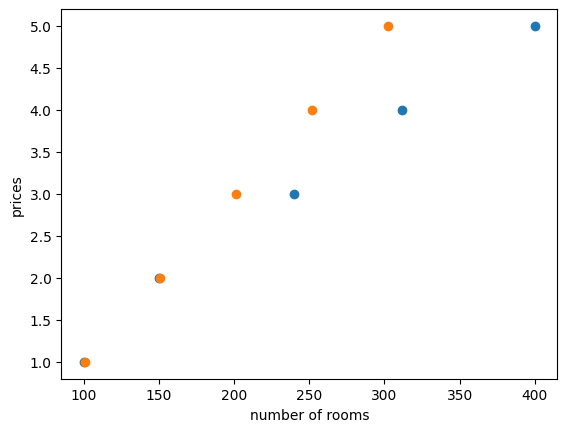

In [22]:
utils.plot_points(targets, houses)
utils.plot_points(pred, houses)

Теперь посмотрим как это простая функция линейной регрессси работает на больших данных.

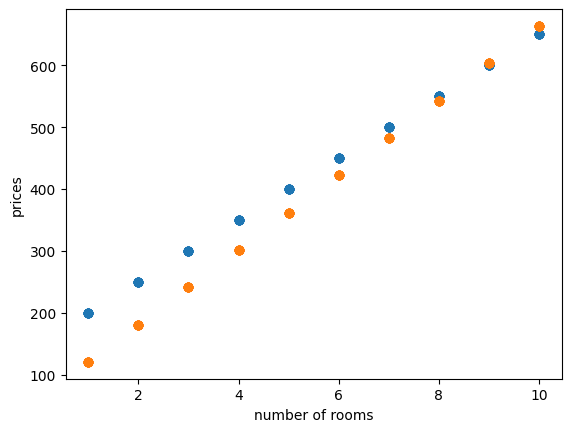

In [47]:
rooms_test = [i for i in range(1, 11) for _ in range(10)] 
targets_test = [50 * r + 150 for r in rooms_test]
pred_t = simple_lin_reg(targets_test, rooms_test)
# print(f"Targets: {targets_test} Predictions: {pred_t}")
utils.plot_points(rooms_test, targets_test)
utils.plot_points(rooms_test, pred_t)

Несмотря на то, что функции почти идеально соприкасаются,-- на реальных данных получится большая проблема, а именно выявится, что модель неправильно учится и из-за грубых шагов прыгает вокруг ответа и не приходит к нему.
- Если предсказание выше — уменьшаем параметры;
- Если предсказание ниже — увеличиваем параметры;

Воспользуемся градиентным спуском:

In [43]:
def lin_reg_gd(targets, rooms, epoches=100, learning_rate=0.1):
    weight = random.random()
    bias = random.random()

    for epoch in range(epoches):
        for i in range(len(targets)):
            x = rooms[i]
            y = targets[i]
            
            pred = x * weight + bias
            error = pred - y
            
            weight -= learning_rate * 2 * error * x
            bias   -= learning_rate * 2 * error

    return [weight * x + bias for x in rooms]

loss = (y` - y)^2 = (x * w + b - y)^2

Ищем производную по весу: dL /dw = (x * w + b - y)^2 = 2 * (x * w + b - y) * x

Ищем производную по смещению: dL /db = (x * w + b - y)^2 = 2 * (x * w + b - y)

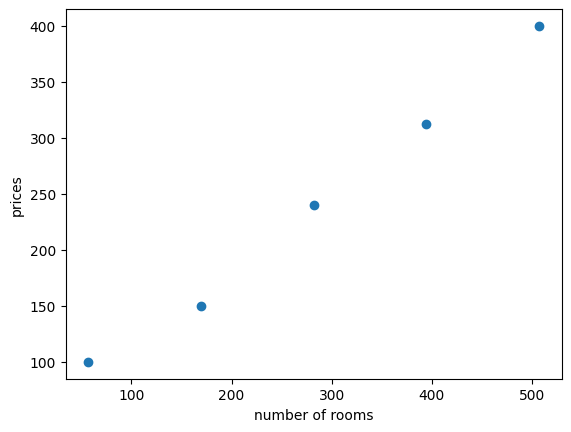

In [45]:
pred_gd = lin_reg_gd(targets, houses)
utils.plot_points(pred_gd, targets)

In [11]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

In [12]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()
    
    for epoch in range(epochs):
        utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price
        

In [19]:
features = np.array([1,2,3,5,6,7]) # number of the rooms
labels = np.array([155, 197, 244, 356, 407, 448]) # prices - our targets

Price per room: 52.469580688360224
Base price: 91.21874365324081


(np.float64(52.469580688360224), np.float64(91.21874365324081))

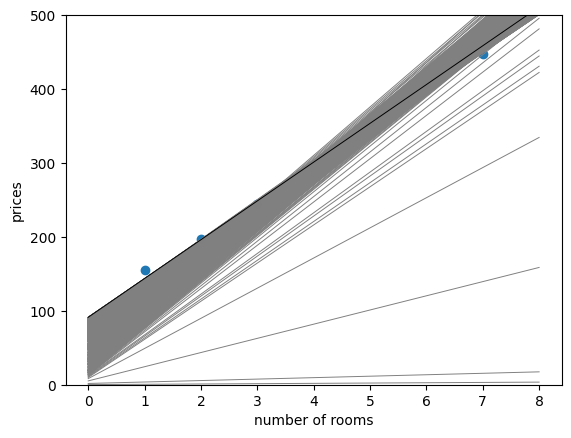

In [20]:
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)